# 비지도 학습 소개

# 1.환경준비

## (1) 라이브러리 로딩

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## (2) Data Loading

In [28]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/customer_segmentation.csv'
data = pd.read_csv(path)
data.head()

,CustID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 2.데이터 전처리

## (1) 데이터 분할

In [29]:
# 군집화는 아래 변수들만 사용합니다.
x = data.loc[:, ['Age', 'Income', 'Score']]

## (2) 스케일링

In [30]:
scaler = MinMaxScaler()
x_s = scaler.fit_transform(x)

# 3.클러스터링

## (1)  k-means 모델 만들기
* k값을 늘려가면서(2~20) 모델을 만들고, inertia 값 혹은 실루엣 점수를 저장합니다.
* 그래프를 통해서 최적의 k값을 결정합니다.
    * 단, k값은 3~6개 사이에서 결정하세요.
* 선정된 k값으로 모델을 생성합니다.

In [39]:
# k의 갯수에 따라 각 점과의 거리를 계산하여 적정한 k를 찾아 봅시다.
kvalues = range(2, 21)
inertias = []

for k in kvalues:
    model = KMeans(n_clusters=k, n_init = 'auto')
    model.fit(x_s)
    inertias.append(model.inertia_)

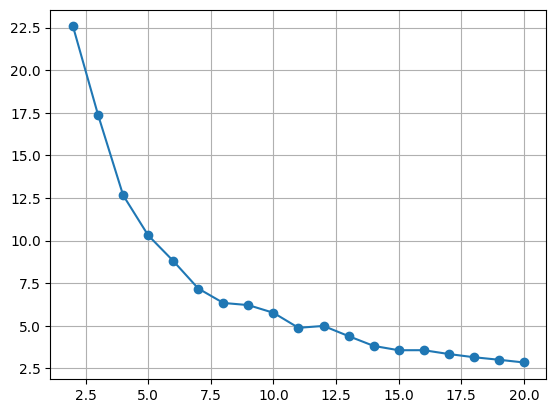

In [40]:
plt.plot(kvalues, inertias, marker='o')
plt.grid()
plt.show()

In [44]:
kvalues = range(2, 21)
sil_score = []

for k in kvalues:
    # 모델 생성
    model = KMeans(n_clusters=k, n_init='auto')
    # 학습하고 예측
    pred = model.fit_predict(x_s)
    # 실루엣 점수 계산
    sil_score.append(silhouette_score(x_s, pred))

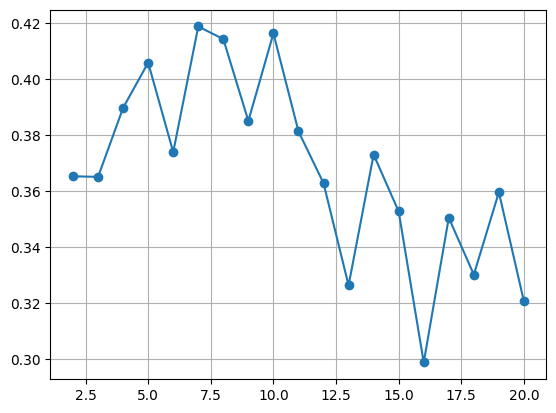

In [45]:
plt.plot(kvalues, sil_score, marker='o')
plt.grid()
plt.show()

## (2) 데이터 군집 결과 정리
* 데이터를 군집화 하여 기존 데이터와 합치기
    * pd.concat([data, pred], axis = 1)

In [50]:
# 예측
pred = model.predict(x_s)

# 예측 결과를 데이터프레임으로 만들고
pred = pd.DataFrame(pred, columns = ['pred'])

# 원본 데이터와 합치기
result = pd.concat([data, pred], axis = 1)

# 예측 결과는 카테고리 타입으로 변경
result['pred'] = pd.Categorical(result['pred'], categories=[0, 1, 2, 3, 4])
result.head()

,CustID,Gender,Age,Income,Score,pred
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,0
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN


# 4.후속 분석
* 군집별 특징을 분석해 봅시다.

In [51]:
result

,CustID,Gender,Age,Income,Score,pred
0,1,Male,19,15,39,NaN
1,2,Male,21,15,81,NaN
2,3,Female,20,16,6,0
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN
...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN
196,197,Female,45,126,28,NaN
197,198,Male,32,126,74,NaN
198,199,Male,32,137,18,NaN


## (1) 군집별 변수 비교
* 활용 가능한 차트 : sns.barplot, sns.kdeplot, sns.boxplot, mosaic

### 1) Age

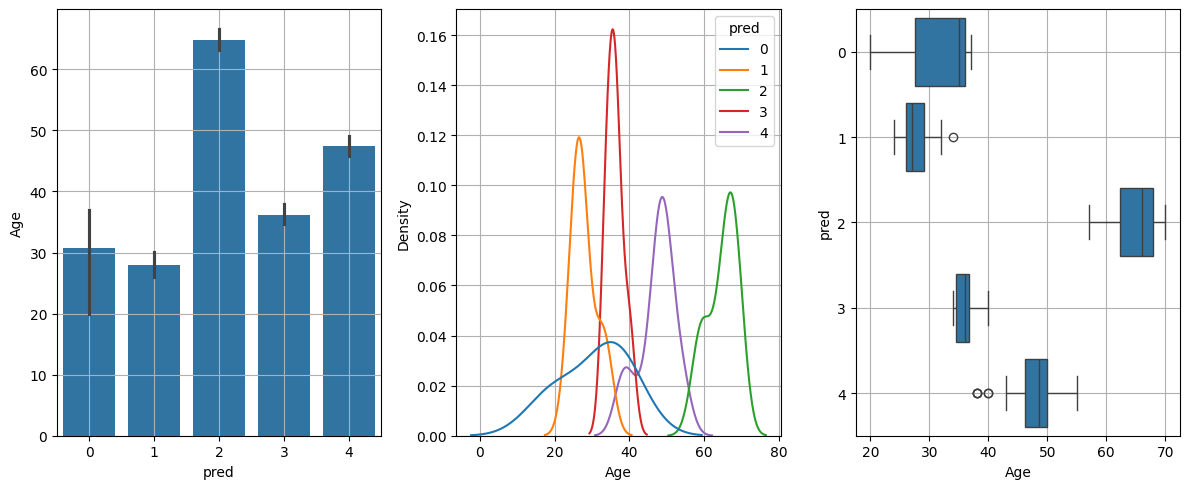

In [52]:
var = 'Age'

plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.barplot(x = 'pred', y = var, data = result)
plt.grid()

plt.subplot(1,3,2)
sns.kdeplot(x = var, data = result, hue = 'pred', common_norm = False)
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(x = var, y = 'pred', data = result)
plt.grid()

plt.tight_layout()
plt.show()

### 2) Income

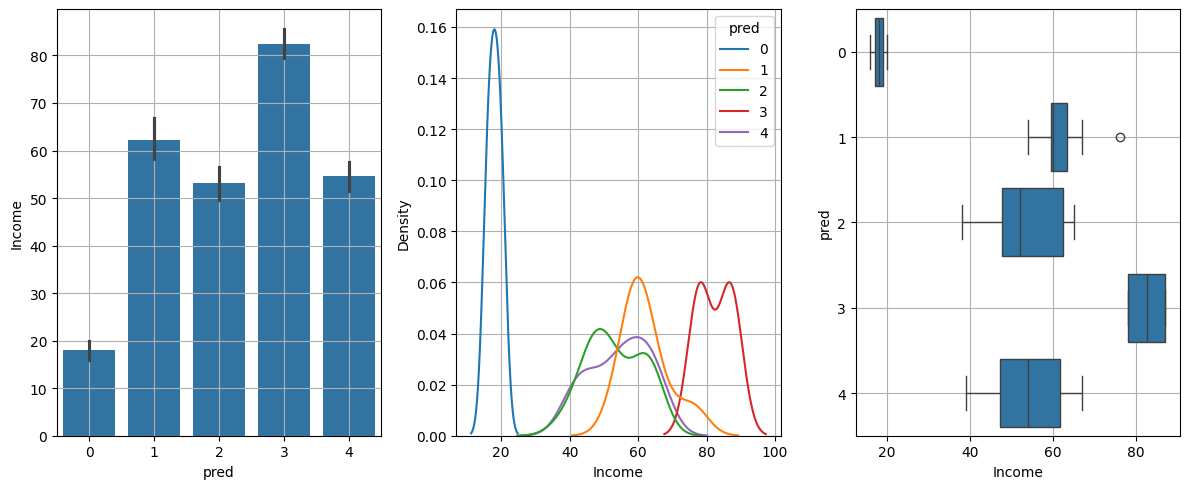

In [53]:
var = 'Income'

plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.barplot(x = 'pred', y = var, data = result)
plt.grid()

plt.subplot(1,3,2)
sns.kdeplot(x = var, data = result, hue = 'pred', common_norm = False)
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(x = var, y = 'pred', data = result)
plt.grid()

plt.tight_layout()
plt.show()

### 3) Score

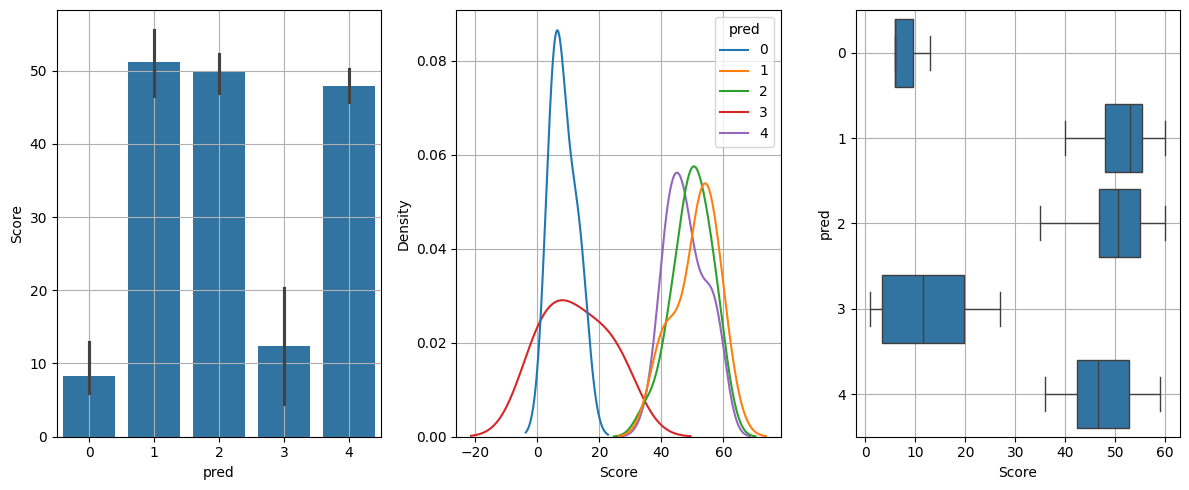

In [54]:
var = 'Score'

plt.figure(figsize = (12,5))

plt.subplot(1,3,1)
sns.barplot(x = 'pred', y = var, data = result)
plt.grid()

plt.subplot(1,3,2)
sns.kdeplot(x = var, data = result, hue = 'pred', common_norm = False)
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(x = var, y = 'pred', data = result)
plt.grid()

plt.tight_layout()
plt.show()

### 4) Gender
* 모자익 플롯을 사용해 봅시다.

In [55]:
from statsmodels.graphics.mosaicplot import mosaic

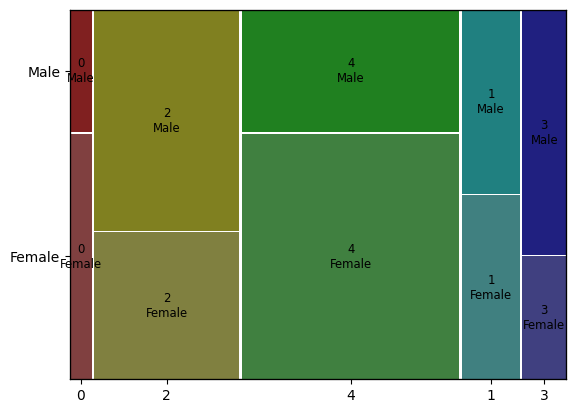

In [56]:
mosaic(result, ['pred','Gender'])
plt.show()

## (2) 한꺼번에 비교하기
* sns.pairplot을 이용하여 한꺼번에 비교해 봅시다.

In [57]:
# 'Age', 'Income', 'Score', 'pred'만 추출
cols = ['Age', 'Income', 'Score', 'pred']
temp = result.loc[:, cols]

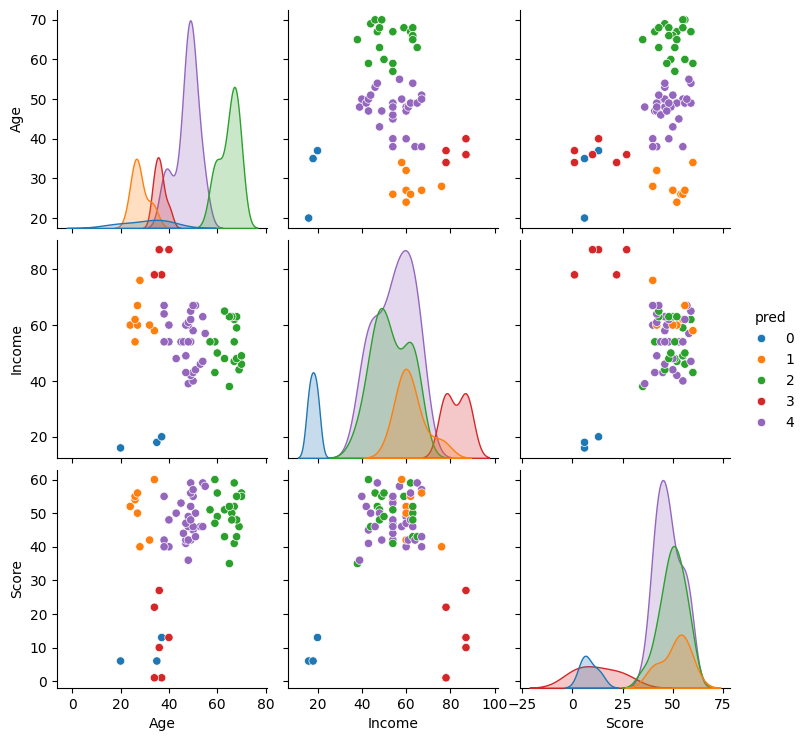

In [58]:
sns.pairplot(temp, hue = 'pred')
plt.show()

## (3) 각 군집별 특징을 정리해 봅시다.
* 각 군집의 특징(다른 군집과 차별화 되는 요소)을 정리합시다.
* 각 군집의 특징으로 볼 때, 어떤 고객군이라고 볼 수 있을까요?
* 각 고객군에 대한 적절한 마케팅 방법은?
* 더 필요한 정보는?